In [3]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## Median Salary for Top 6 Data Jobs


In [4]:
df_copy=df.copy()

In [5]:
df_copy['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [6]:
df_copy.dropna(subset=['salary_year_avg'],inplace=True)

In [7]:
df_copy.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64

In [8]:
job_titles=df_copy['job_title_short'].value_counts().sort_values(ascending=False).index[:6].tolist()

In [9]:
job_titles



['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [10]:
df_Top_6=df_copy[df_copy['job_title_short'].isin(job_titles)]

In [11]:
job_order=df_Top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

In [12]:
import seaborn as sns


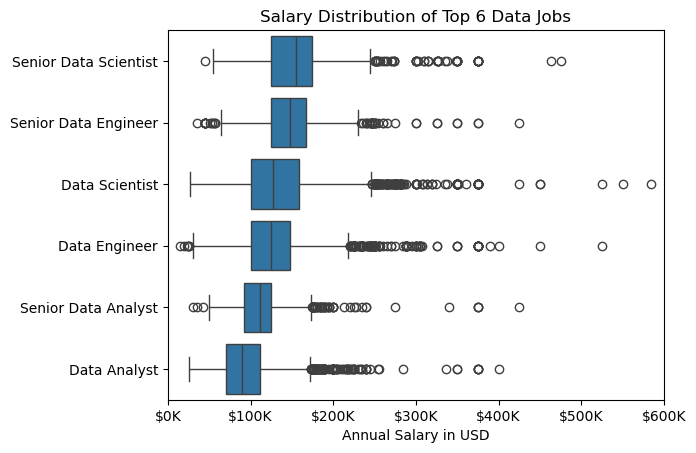

In [13]:
sns.boxplot(y='job_title_short',x='salary_year_avg',data=df_Top_6,order=job_order)
plt.xlabel('Annual Salary in USD')
plt.ylabel('')
plt.title('Salary Distribution of Top 6 Data Jobs')
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show() 

### Median Salary vs Skill for Data Analyst


In [14]:
df_DA=df_copy[df_copy['job_title_short']=='Data Analyst']

In [15]:
df_DA_explode=df_DA.explode('job_skills')

In [48]:
df_DA_salary=df_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)


In [26]:
df_DA_salary

,median,count
job_skills,,
svn,400000.0,1
solidity,179000.0,1
dplyr,167500.0,3
gitlab,163782.0,7
terraform,163782.0,3


In [27]:
df_DA_count

,median,count
job_skills,,
sql,92500.0,3079
excel,84479.0,2135
python,98500.0,1838
tableau,95000.0,1657
r,92527.5,1073


In [49]:
df_DA_count=df_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)


In [25]:
import seaborn as sns

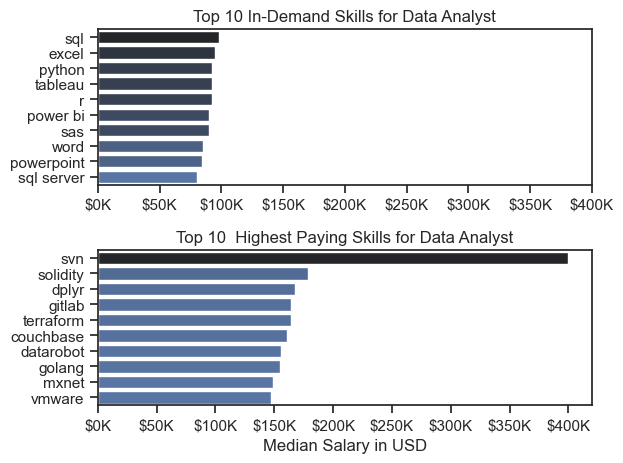

In [51]:
fig,ax=plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(y=df_DA_count.index,x='median',data=df_DA_count.sort_values(by='median',ascending=False),ax=ax[0],hue='median',palette='dark:b_r')
ax[0].set_title('Top 10 In-Demand Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,400000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove() 

sns.barplot(y=df_DA_salary.index,x='median',data=df_DA_salary,ax=ax[1],hue='median',palette='dark:b_r')
ax[1].set_title('Top 10  Highest Paying Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in USD')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()
plt.tight_layout()